In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [66]:
class Normal():
    def __init__(self, mu, sigma_2):
        self.mu = mu
        self.sigma_2 = sigma_2
        self.normalize()

    def normalize(self):
        X_0 = np.random.randn(10000)
        X = X_0 * np.sqrt(self.sigma_2) + self.mu
        self.data = X

    def get_histgram(self):
        sns.histplot(self.data)

    def get_density(self):
        sns.kdeplot(self.data)

    def get_distplot(self):
        sns.distplot(self.data)

class GaussMixtureNormal(Normal):
    def __init__(self, X, Y, ita):
        self.data = X.data + ita * Y.data

In [67]:
x = Normal(15,9)
y = Normal(1,16)
z = np.random.binomial(1,0.2,10000)

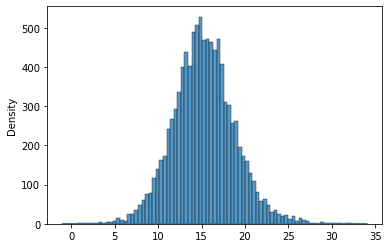

In [68]:
Z = GaussMixtureNormal(x,y,z)
Z.get_density()
Z.get_histgram()

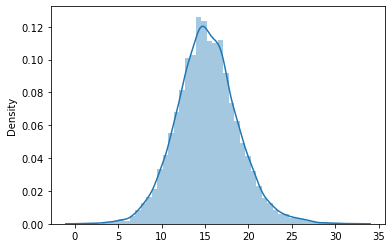

In [69]:
Z.get_distplot()

In [28]:
cats = pd.cut(Z.data,100)
cats

[(11.904, 12.348], (15.009, 15.453], (13.678, 14.122], (20.332, 20.775], (9.686, 10.13], ..., (10.573, 11.017], (17.227, 17.67], (12.791, 13.235], (15.009, 15.453], (13.235, 13.678]]
Length: 100000
Categories (100, interval[float64]): [(-4.552, -4.064] < (-4.064, -3.621] < (-3.621, -3.177] < (-3.177, -2.734] ... (38.074, 38.518] < (38.518, 38.961] < (38.961, 39.405] < (39.405, 39.848]]

In [31]:
s = pd.value_counts(cats)
s

(14.565, 15.009]    5180
(14.122, 14.565]    5157
(15.009, 15.453]    5050
(15.453, 15.896]    5045
(15.896, 16.34]     4923
                    ... 
(37.187, 37.631]       0
(37.631, 38.074]       0
(38.074, 38.518]       0
(38.518, 38.961]       0
(38.961, 39.405]       0
Length: 100, dtype: int64

In [33]:
s.sum()
s /= s.sum()
s

(14.565, 15.009]    0.05180
(14.122, 14.565]    0.05157
(15.009, 15.453]    0.05050
(15.453, 15.896]    0.05045
(15.896, 16.34]     0.04923
                     ...   
(37.187, 37.631]    0.00000
(37.631, 38.074]    0.00000
(38.074, 38.518]    0.00000
(38.518, 38.961]    0.00000
(38.961, 39.405]    0.00000
Length: 100, dtype: float64

In [50]:
for i in s.index[:5]:
    print(i.left, i.right)

14.565 15.009
14.122 14.565
15.009 15.453
15.453 15.896
15.896 16.34


In [51]:
s.index[0]

Interval(14.565, 15.009, closed='right')

In [4]:
import tushare as ts
import datetime as dt

In [22]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
endDate = endDate.strftime('%Y-%m-%d')
startDate = startDate.strftime('%Y-%m-%d')
ts.get_hist_data('601318',start=startDate,end=endDate)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2022-04-29,43.80,45.12,44.56,43.60,516386.38,0.90,2.06,44.114,45.260,46.884,577262.65,498821.07,471290.78,0.48
2022-04-28,43.79,43.91,43.66,43.16,525999.38,-0.25,-0.57,44.494,45.634,47.091,553450.53,478593.94,474242.82,0.49
2022-04-27,43.41,44.20,43.91,43.18,531083.50,0.32,0.73,45.006,46.087,47.268,558059.37,461878.90,464060.69,0.49
2022-04-26,44.84,45.18,43.59,43.51,638923.62,-1.26,-2.81,45.406,46.478,47.465,527964.64,440545.69,457190.83,0.59
2022-04-25,45.00,46.18,44.85,44.70,673920.38,-1.61,-3.46,45.976,46.966,47.667,474088.52,423392.88,453241.55,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-14,59.65,59.65,57.91,57.78,1065618.38,-1.79,-3.00,59.576,61.212,63.254,788623.89,762344.56,676806.83,0.98
2021-07-13,59.40,59.88,59.70,59.05,513337.44,0.30,0.51,60.468,61.849,63.709,680133.72,703419.61,649889.39,0.47
2021-07-12,60.31,60.48,59.40,59.32,818989.25,-0.69,-1.15,61.108,62.317,64.077,714628.81,707052.68,678100.37,0.76


In [16]:
startDate.strftime('%Y-%m-%d')

'2021-07-08'

In [23]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
endDate = endDate.strftime('%Y-%m-%d')
startDate = startDate.strftime('%Y-%m-%d')
ts.get_hist_data('AAPL',start=startDate,end=endDate)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


In [25]:
pro = ts.pro_api('58d6a5ad6a2ae259ac0131313f3c9ff4f55a92702a343f8c1345a068')
df = pro.daily(ts_code='000001.SZ', start_date='20180701', end_date='20180718')

In [26]:
df

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20180718,8.75,8.85,8.69,8.70,8.72,-0.02,-0.23,525152.77,460697.377
1,000001.SZ,20180717,8.74,8.75,8.66,8.72,8.73,-0.01,-0.11,375356.33,326396.994
2,000001.SZ,20180716,8.85,8.90,8.69,8.73,8.88,-0.15,-1.69,689845.58,603427.713
3,000001.SZ,20180713,8.92,8.94,8.82,8.88,8.88,0.00,0.00,603378.21,535401.175
4,000001.SZ,20180712,8.60,8.97,8.58,8.88,8.64,0.24,2.78,1140492.31,1008658.828
5,000001.SZ,20180711,8.76,8.83,8.68,8.78,8.98,-0.20,-2.23,851296.70,744765.824
6,000001.SZ,20180710,9.02,9.02,8.89,8.98,9.03,-0.05,-0.55,896862.02,803038.965
7,000001.SZ,20180709,8.69,9.03,8.68,9.03,8.66,0.37,4.27,1409954.60,1255007.609
8,000001.SZ,20180706,8.61,8.78,8.45,8.66,8.60,0.06,0.70,988282.69,852071.526
9,000001.SZ,20180705,8.62,8.73,8.55,8.60,8.61,-0.01,-0.12,835768.77,722169.579


In [27]:
df = pro.us_daily(ts_code='AAPL', start_date='20190101', end_date='20190904')
df

Exception: 抱歉，您没有访问该接口的权限，权限的具体详情访问：https://tushare.pro/document/1?doc_id=108。

In [28]:
import requests
thsUrl = 'https://ft.10jqka.com.cn/ds_service/api/v1/real_time_quotation'
accessToken = '12fe737bc2014f39f195a2b7b03e3b11ec63b66b'
thsHeaders = {"Content-Type":"application/json","access_token":accessToken}
thsPara = {"codes":"300033.SZ","indicators":"open,high,low,latest"}
thsResponse = requests.post(url=thsUrl,json=thsPara,headers=thsHeaders)
print(thsResponse.content)

b'{"errmsg":"Access_Token is expired or ilegal.","errorcode":-1302}'


In [54]:
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
endDate = endDate.strftime('%Y%m%d')
startDate = startDate.strftime('%Y%m%d')
ts.get_hist_data('601318',start=startDate,end=endDate)

本接口即将停止更新，请尽快使用Pro版接口：https://tushare.pro/document/2


,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2022-04-29,43.80,45.12,44.56,43.60,516386.38,0.90,2.06,44.114,45.260,46.884,577262.65,498821.07,471290.78,0.48
2022-04-28,43.79,43.91,43.66,43.16,525999.38,-0.25,-0.57,44.494,45.634,47.091,553450.53,478593.94,474242.82,0.49
2022-04-27,43.41,44.20,43.91,43.18,531083.50,0.32,0.73,45.006,46.087,47.268,558059.37,461878.90,464060.69,0.49
2022-04-26,44.84,45.18,43.59,43.51,638923.62,-1.26,-2.81,45.406,46.478,47.465,527964.64,440545.69,457190.83,0.59
2022-04-25,45.00,46.18,44.85,44.70,673920.38,-1.61,-3.46,45.976,46.966,47.667,474088.52,423392.88,453241.55,0.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-10,52.99,53.56,53.08,52.50,761134.44,0.14,0.26,52.078,51.287,50.933,894127.36,652504.56,570728.46,0.70
2022-01-07,51.49,53.33,52.94,51.45,1230759.75,1.64,3.20,51.544,50.961,50.840,813500.52,607684.63,569557.07,1.14
2022-01-06,51.99,52.02,51.30,51.22,661658.25,-0.77,-1.48,51.038,50.689,50.758,652924.55,525106.55,570483.89,0.61


In [51]:
pro.daily(ts_code='000001.SZ', start_date='20180101', end_date='20210101')

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20201231,19.21,19.58,19.02,19.34,19.20,0.14,0.7292,924503.43,1781736.285
1,000001.SZ,20201230,19.00,19.20,18.72,19.20,19.17,0.03,0.1565,978497.78,1854082.812
2,000001.SZ,20201229,18.87,19.30,18.70,19.17,18.85,0.32,1.6976,963092.23,1837947.238
3,000001.SZ,20201228,18.02,18.86,17.96,18.85,18.04,0.81,4.4900,1270337.06,2352947.321
4,000001.SZ,20201225,18.26,18.26,17.80,18.04,18.26,-0.22,-1.2048,577077.33,1038128.197
...,...,...,...,...,...,...,...,...,...,...,...
725,000001.SZ,20180108,13.25,13.29,12.86,12.96,13.30,-0.34,-2.5600,2158620.81,2806099.169
726,000001.SZ,20180105,13.21,13.35,13.15,13.30,13.25,0.05,0.3800,1210312.72,1603289.517
727,000001.SZ,20180104,13.32,13.37,13.13,13.25,13.33,-0.08,-0.6000,1854509.48,2454543.516
728,000001.SZ,20180103,13.73,13.86,13.20,13.33,13.70,-0.37,-2.7000,2962498.38,4006220.766


In [73]:
stockList = ['600519.SH','300496.SZ','000975.SZ','300464.SZ','601318.SH']

In [75]:
def get_stock_data(stocks, start, end):
    stockData = pd.DataFrame()
    returns = pd.DataFrame()
    for stock in stocks:

        stock_data = pro.daily(ts_code=stock, start_date=start, end_date=end)
        stockData[stock] = stock_data['close']
        returns[stock] = stock_data['pct_chg']
    stockData.index = stock_data['trade_date']

    returns.index = stock_data['trade_date']
    return stockData, returns

In [78]:
def get_data(stocks, start, end):
    stockData, returns = get_stock_data(stocks, start, end)
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

In [80]:
meanReturns, covMatrix = get_data(stockList, startDate, endDate)

In [113]:
meanReturns, covMatrix

(600519.SH   -0.020579
 300496.SZ   -0.197774
 000975.SZ   -0.000622
 300464.SZ   -0.231379
 601318.SH   -0.144580
 dtype: float64,
            600519.SH  300496.SZ  000975.SZ  300464.SZ  601318.SH
 600519.SH   5.231604   2.515533  -0.429877   0.370035   1.556363
 300496.SZ   2.515533  13.212745   0.946988   3.283867   1.011571
 000975.SZ  -0.429877   0.946988   7.280402   2.146923   1.199458
 300464.SZ   0.370035   3.283867   2.146923  18.036819   1.148924
 601318.SH   1.556363   1.011571   1.199458   1.148924   3.584748)

In [99]:
weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)
weights

array([0.21984562, 0.14886883, 0.20225963, 0.15811684, 0.27090909])

In [100]:
mc_sims = 100
T = 100
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T
meanM

array([[-0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.02057919, -0.02057919,
        -0.02057919, -0.02057919, -0.02057919, -0.0

In [101]:
portfolio_sims = np.full(shape=(T, mc_sims),fill_value=0.0)
portfolio_sims

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [108]:
initial_portfolio = 1000

In [109]:
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T,len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initial_portfolio

In [110]:
portfolio_sims

array([[ 2.34307168e+03, -8.52709975e+02, -7.80566567e+02, ...,
         7.56377377e+02, -8.53381771e+02,  3.46007545e+02],
       [ 7.29995441e+03, -8.64134033e+01, -2.75489186e+03, ...,
         1.67264373e+03, -1.12715317e+03,  7.23496682e+02],
       [ 2.79674796e+04, -4.96101764e+01, -2.43861525e+03, ...,
         8.30680130e+02, -2.52261155e+03,  1.28095707e+03],
       ...,
       [-6.59496642e+05,  7.70730650e-05, -2.56321407e+08, ...,
        -4.06931626e+03, -8.09173883e-04,  7.66403713e+03],
       [-1.01535859e+06,  2.69454938e-04,  4.85426274e+07, ...,
        -7.11228613e+03,  9.42408463e-04, -1.66726816e+04],
       [-3.66637431e+05, -2.27400191e-05, -2.23302543e+07, ...,
        -8.48355529e+03, -4.62058708e-04, -7.39362829e+04]])

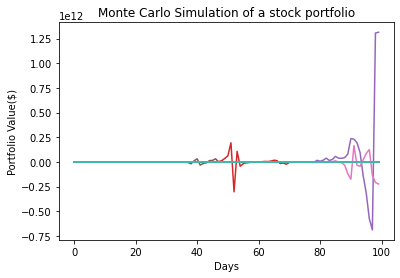

In [111]:
import matplotlib.pyplot as plt
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value($)')
plt.xlabel('Days')
plt.title("Monte Carlo Simulation of a stock portfolio")
plt.show()

In [115]:
from urllib.parse import urlencode
from pandas_datareader import data as pdr

In [116]:
stockList = ['CBA','BHP','TLS']
stocks = [stock +'.AX' for stock in stockList]
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)
pdr.get_data_yahoo(stocks, startDate, endDate)

[*********************100%***********************]  3 of 3 completed

3 Failed downloads:
- CBA.AX: No data found for this date range, symbol may be delisted
- TLS.AX: No data found for this date range, symbol may be delisted
- BHP.AX: No data found for this date range, symbol may be delisted


Empty DataFrame
Columns: [(Adj Close, BHP.AX), (Adj Close, CBA.AX), (Adj Close, TLS.AX), (Close, BHP.AX), (Close, CBA.AX), (Close, TLS.AX), (High, BHP.AX), (High, CBA.AX), (High, TLS.AX), (Low, BHP.AX), (Low, CBA.AX), (Low, TLS.AX), (Open, BHP.AX), (Open, CBA.AX), (Open, TLS.AX), (Volume, BHP.AX), (Volume, CBA.AX), (Volume, TLS.AX)]
Index: []

In [119]:
import yfinance as yf
aapl= yf.Ticker("aapl")
aapl.history()

- AAPL: No data found for this date range, symbol may be delisted


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [122]:
import pandas_datareader as pdr
pdr.get_data_fred('GS10')

,GS10
DATE,
2017-06-01,2.19
2017-07-01,2.32
2017-08-01,2.21
2017-09-01,2.20
2017-10-01,2.36
2017-11-01,2.35
2017-12-01,2.40
2018-01-01,2.58
2018-02-01,2.86


In [126]:
import pandas_datareader.data as web
web.DataReader("600797.SS", "yahoo", startDate, endDate)

Exception in thread Thread-15:
Traceback (most recent call last):
  File "/Users/david/opt/anaconda3/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/Users/david/opt/anaconda3/lib/python3.8/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/david/opt/anaconda3/lib/python3.8/site-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/Users/david/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 188, in _download_one_threaded
    data = _download_one(ticker, start, end, auto_adjust, back_adjust,
  File "/Users/david/opt/anaconda3/lib/python3.8/site-packages/yfinance/multi.py", line 202, in _download_one
    return Ticker(ticker).history(period=period, interval=interval,
  File "/Users/david/opt/anaconda3/lib/python3.8/site-packages/yfinance/base.py", line 153, in history
    _time.strptime(str(start), '%Y-%m-%d')))
  File "/Users/david/opt/anaco

KeyboardInterrupt: 

In [1]:
import pandas_datareader.data as web
import datetime


start=datetime.datetime(2017, 1, 1)
end=datetime.datetime.today()
microsoft=web.get_data_stooq(['MSFT','DAX','BABA.US','STO.US'],start,end)
microsoft

Attributes    Close                     High                       Low  \
Symbols        MSFT     DAX BABA.US     MSFT     DAX BABA.US      MSFT   
2017-01-03   58.064  22.155   88.60   58.306  22.164   89.00   57.6450   
2017-01-04   57.805  22.325   90.51   58.222  22.325   90.89   57.6400   
2017-01-05   57.805  22.536   94.37   58.140  22.552   94.81   57.5520   
2017-01-06   58.306  22.465   93.89   58.594  22.527   94.50   57.5620   
2017-01-09   58.122  22.447   94.72   58.531  22.474   95.65   58.0270   
...             ...     ...     ...      ...     ...     ...       ...   
2022-04-28  289.630  26.460   90.91  290.980  26.480   90.98  281.4562   
2022-04-29  277.520  26.240   97.09  289.880  26.790  103.52  276.5000   
2022-05-02  284.470  26.190  101.21  284.940  26.330  101.32  276.2200   
2022-05-03  281.780  26.330  100.38  284.130  26.375  102.69  280.1500   
2022-05-04  289.980  26.960  101.41  290.880  26.960  101.57  276.7300   

Attributes                     Open                       Volume           \
Symbols        DAX BABA.US     MSFT     DAX  BABA.US        MSFT      DAX   
2017-01-03  22.075   88.08   58.261  22.155   89.000  21350078.0   8954.0   
2017-01-04  22.076   88.58   57.972  22.076   88.985  18179213.0   9184.0   
2017-01-05  22.262   91.64   57.703  22.262   91.910  23015813.0   4803.0   
2017-01-06  22.465   93.00   57.805  22.527   94.400  18941262.0   2555.0   
2017-01-09  22.342   93.31   58.231  22.342   94.160  20039290.0   1540.0   
...            ...     ...      ...     ...      ...         ...      ...   
2022-04-28  25.940   86.94  285.185  26.410   88.620  33646570.0  28689.0   
2022-04-29  26.190   96.66  288.610  26.590  101.530  37073923.0  39711.0   
2022-05-02  25.910   95.15  277.710  26.180   96.410  35151105.0  55171.0   
2022-05-03  26.250   99.43  283.960  26.360  100.130  25978605.0  10755.0   
2022-05-04  26.340   96.61  282.590  26.490   97.720  33599320.0  16023.0   

Attributes              
Symbols        BABA.US  
2017-01-03   8787301.0  
2017-01-04  11462690.0  
2017-01-05  16787882.0  
2017-01-06   7597313.0  
2017-01-09  10817809.0  
...                ...  
2022-04-28  17707498.0  
2022-04-29  44933353.0  
2022-05-02  25479548.0  
2022-05-03  15216107.0  
2022-05-04  17740624.0  

[1344 rows x 15 columns]

In [ ]:
import tushare as ts
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas_datareader.data as web

def get_data(stocks, start, end):
    stockData = web.get_data_stooq(stocks,start,end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix


stockList = ['BABA.US','NIO.US','TWTR.US','GDX.US','700.HK','3799.HK']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=300)

meanReturns, covMatrix = get_data(stockList, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

mc_sims = 100
T = 100
meanM = np.full(shape=(T, len(weights)), fill_value=meanReturns)
meanM = meanM.T

portfolio_sims = np.full(shape=(T, mc_sims),fill_value=0.0)
initial_portfolio = 10000
for m in range(0, mc_sims):
    Z = np.random.normal(size=(T,len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initial_portfolio

plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value($)')
plt.xlabel('Days')
plt.title("Monte Carlo Simulation of a stock portfolio")
plt.show()

In [ ]:
from monte_carlo_simulation import monte_carlo
stockList = ['BABA.US','NIO.US','TWTR.US','GDX.US','700.HK','3799.HK']
mc_sims = 100
T = 100
initial_portfolio = 10000
days_back = 300
m = monte_carlo.MonteCarloEstimator(stockList, mc_sims, T, initial_portfolio, days_back)